# ASTR 596: The Midterm

#### 5 parts, 20 pts each. Some parts are easier than others, so are essentially free points, but you'll need to solve the earlier parts correctly to get the right answer on the later parts. I'd strongly recommend skimming the Riess et al. 2011 paper. 

#### We've been building up our ability to deal with complex data, and you've now got the ability to fit straight lines with frequentist tools (as you did with the Cepheids), and infer constraints on more complex high-dimensional models given the data with MCMC. So let's combine the two and infer one of the most important numbers in the Universe - the Hubble constant.

#### There are measurements of several Cepheid variable stars in each of 9 nearby galaxies.

#### Begin by reading this code and familiarizing yourself with what attributes and functions are available to you. In particular, it will help to read comments at the top of the data file `R11ceph.dat`.

In [23]:
exec(open('cepheids.py').read())
ceph = Cepheids('R11ceph.dat')
hosts = ceph.list_hosts()

In [24]:
import pandas as pd
table = pd.read_csv('R11ceph.dat',delim_whitespace = True, comment='#')

In [33]:
hosts

array(['1309', '3021', '3370', '3982', '4038', '4258', '4536', '4639',
       '5584'], dtype='<U21')

In [32]:
table

,27185,4536,24.512300,0.310000,13.000000,-3.460000,0.130000
0,42353,4536,25.9907,0.74,13.070,-3.03,0.37
1,50718,4536,24.1492,0.42,13.730,-3.36,0.28
2,72331,4536,24.4751,0.44,13.910,-3.19,0.22
3,65694,4536,24.8582,0.38,14.380,-3.10,0.39
4,58805,4536,22.9467,0.35,14.440,-3.22,0.26
...,...,...,...,...,...,...,...
640,29163,4258,24.1520,0.57,6.739,-3.25,0.38
641,34729,4258,22.6608,0.50,14.920,-3.25,0.00
642,89375,4258,22.4128,0.45,12.380,-3.11,0.42
643,246695,4258,22.5969,0.40,11.200,-3.11,0.49


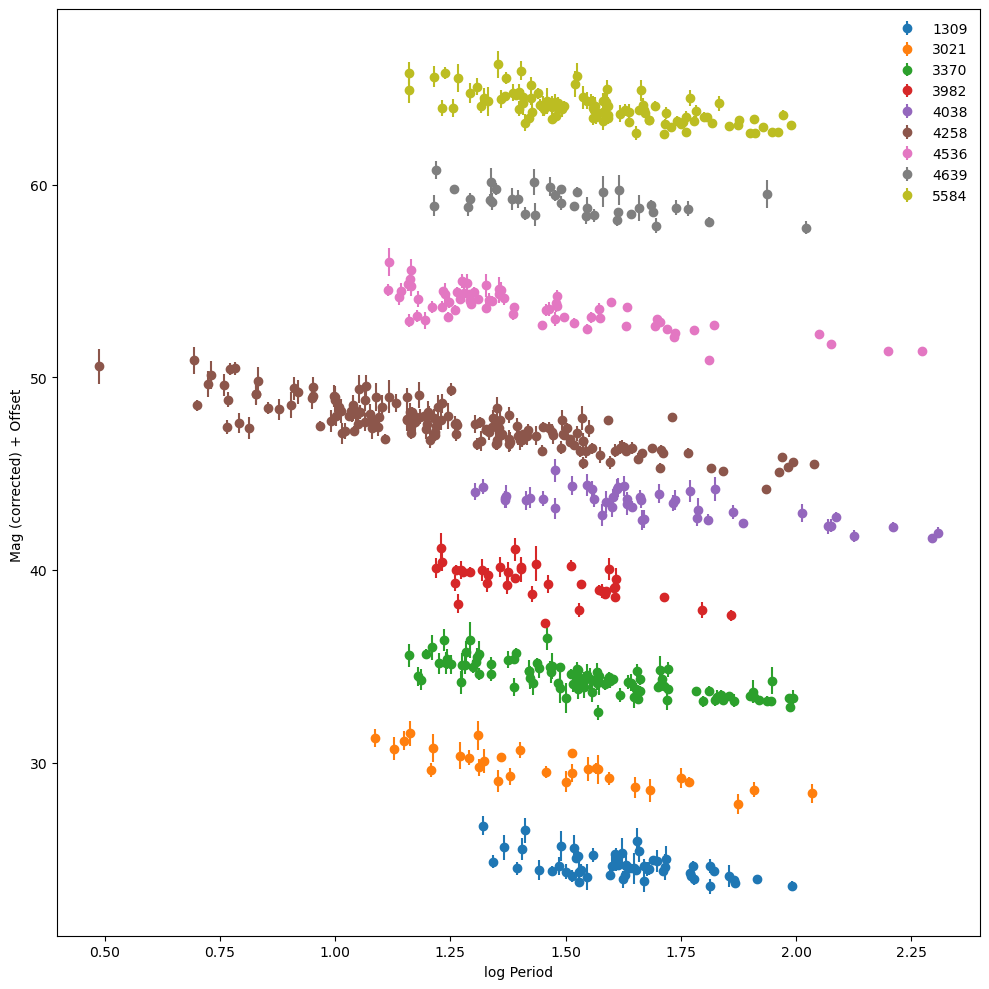

In [47]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

for i, ID in enumerate(hosts):
    ceph.select(ID)
    mobs = ceph.mobs
    logP = ceph.logP
    sigma_obs = ceph.sigma
    ax.errorbar(logP, mobs+(5*i), yerr=sigma_obs, linestyle='None', marker='o', label=ID)
    
ax.legend(frameon=False)
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected) + Offset ')
fig.tight_layout()

# Q1.

## This data was taken from [Riess et al., 2011](https://arxiv.org/abs/1103.2976)

## The global model for the magnitudes of these Cepheids is given in Equation 1. You may ignore the effect of metalicity

## Some parameters (such as distance modulus) are specific to each galaxy.

## Others are common to all galaxies. 

## Assuming Gaussian magnitude errors and no period error (and you may ignore metallicity entirely), but that Cepheids scatter off the period-luminosity relation because of some Gaussian intrinsic dispersion $\sigma_{\text{int}}$, write down your expression for the likelihood being careful to use the same indices that Riess et. al used.


In [298]:
# ignore metalicity (O/H)
#9 mu, zp, bw
#gal, logPeriod, magnitude, mag_err

def model(mui, mu4258, zp, bw, logP):
    return ((mui-mu4258)+zp+bw*logP)

def log_likelihood(theta,ceph,hosts):    
    mu1309, mu3021, mu3370, mu3982, mu4038  = theta[0], theta[1], theta[2], theta[3], theta[4]
    mu4258, mu4536, mu4639, mu5584, zp, bw = theta[5], theta[6], theta[7], theta[8], theta[9], theta[10]
    
    ceph.select(1309)
    mag1 = ceph.mobs
    logP1 = ceph.logP
    mag_err1 = ceph.sigma
    dy1 = mag1 - model(mu1309, mu4258, zp, bw, logP1)
    gal1L = (1/(mag_err1*np.sqrt(2*np.pi)))*np.exp((-dy1**2/(2*mag_err1**2)))
    gal1logL = -.5*np.sum(dy1**2/(2*mag_err1**2))
    
    ceph.select(3021)
    mag2 = ceph.mobs
    logP2 = ceph.logP
    mag_err2 = ceph.sigma
    dy2 = mag2 - model(mu3021, mu4258, zp, bw, logP2)
    gal2L = (1/(mag_err2*np.sqrt(2*np.pi)))*np.exp((-dy2**2/(2*mag_err2**2)))
    gal2logL = -.5*np.sum(dy2**2/(2*mag_err2**2))
    
    ceph.select(3370)
    mag3 = ceph.mobs
    logP3 = ceph.logP
    mag_err3 = ceph.sigma
    dy3 = mag3 - model(mu3370, mu4258, zp, bw, logP3)
    gal3L = (1/(mag_err3*np.sqrt(2*np.pi)))*np.exp((-dy3**2/(2*mag_err3**2)))
    gal3logL = -.5*np.sum(dy3**2/(2*mag_err3**2))
    
    
    ceph.select(3982)
    mag4 = ceph.mobs
    logP4 = ceph.logP
    mag_err4 = ceph.sigma
    dy4 = mag4 - model(mu3982, mu4258, zp, bw, logP4)
    gal4L = (1/(mag_err4*np.sqrt(2*np.pi)))*np.exp((-dy4**2/(2*mag_err4**2)))
    gal4logL = -.5*np.sum(dy4**2/(2*mag_err4**2))
    
    ceph.select(4038)
    mag5 = ceph.mobs
    logP5 = ceph.logP
    mag_err5 = ceph.sigma
    dy5 = mag5 - model(mu4038, mu4258, zp, bw, logP5)
    gal5L = (1/(mag_err5*np.sqrt(2*np.pi)))*np.exp((-dy5**2/(2*mag_err5**2)))
    gal5logL = -.5*np.sum(dy5**2/(2*mag_err5**2))
    
    ceph.select(4258)
    mag6 = ceph.mobs
    logP6 = ceph.logP
    mag_err6 = ceph.sigma
    dy6 = mag6 - model(mu4258, mu4258, zp, bw, logP6)
    gal6L = (1/(mag_err6*np.sqrt(2*np.pi)))*np.exp((-dy6**2/(2*mag_err6**2)))
    gal6logL = -.5*np.sum(dy6**2/(2*mag_err6**2))
    
    ceph.select(4536)
    mag7 = ceph.mobs
    logP7 = ceph.logP
    mag_err7 = ceph.sigma
    dy7 = mag7 - model(mu4536, mu4258, zp, bw, logP7)
    gal7L = (1/(mag_err7*np.sqrt(2*np.pi)))*np.exp((-dy7**2/(2*mag_err7**2)))
    gal7logL = -.5*np.sum(dy7**2/(2*mag_err7**2))

    ceph.select(4639)
    mag8 = ceph.mobs
    logP8 = ceph.logP
    mag_err8 = ceph.sigma
    dy8 = mag8 - model(mu4639, mu4258, zp, bw, logP8)
    gal8L = (1/(mag_err8*np.sqrt(2*np.pi)))*np.exp((-dy8**2/(2*mag_err8**2)))
    gal8logL = -.5*np.sum(dy8**2/(2*mag_err8**2))
    
    ceph.select(5584)
    mag9 = ceph.mobs
    logP9 = ceph.logP
    mag_err9 = ceph.sigma
    dy9 = mag9 - model(mu5584, mu4258, zp, bw, logP9)
    gal9L = (1/(mag_err9*np.sqrt(2*np.pi)))*np.exp((-dy9**2/(2*mag_err9**2)))
    gal9logL = -.5*np.sum(dy9**2/(2*mag_err9**2))
    
#     logL = np.log((np.prod(gal1L)*np.prod(gal2L)*np.prod(gal3L)*np.prod(gal4L)*np.prod(gal5L)*
#          np.prod(gal6L)*np.prod(gal7L)*np.prod(gal8L)*np.prod(gal9L)))
    logL = gal1logL + gal2logL + gal3logL + gal4logL + gal5logL + gal6logL + gal7logL + gal8logL + gal9logL
    
    return logL

# Q2. 

## Given what you know for each of the parameters in this model, write down physically motivated (i.e. not just top hats on everything) priors, along with your explanation.

## Think particularly about the priors for distances to each galaxy.

In [355]:
def log_prior(theta):
    #from paper, should be about 32.59
    prior_mu1309 = np.log((1/(4*np.sqrt(2*np.pi))*np.exp(-.5*((theta[0]-(32.59))/4)**2)))
#     print(prior_mu1309)
    #from paper, should be about 32.27
    prior_mu3021 = np.log((1/(4*np.sqrt(2*np.pi))*np.exp(-.5*((theta[1]-(32.27))/4)**2)))
#     print(prior_mu3021)
    #from paper, should be about 32.13
    prior_mu3370 = np.log((1/(4*np.sqrt(2*np.pi))*np.exp(-.5*((theta[2]-(32.13))/4)**2)))
#     print(prior_mu3370)
    #from paper, should be about 31.70
    prior_mu3982 = np.log((1/(4*np.sqrt(2*np.pi))*np.exp(-.5*((theta[3]-(31.70))/4)**2)))
#     print(prior_mu3982)
    #from paper, should be about 31.66
    prior_mu4038 = np.log((1/(4*np.sqrt(2*np.pi))*np.exp(-.5*((theta[4]-(31.66))/4)**2)))
#     print(prior_mu4038)
    #from paper, should be about 29.2
    prior_mu4258 = np.log((1/(4*np.sqrt(2*np.pi))*np.exp(-.5*((theta[5]-(29))/4)**2)))
#     print(prior_mu4258)
    #from paper, should be about 30.91
    prior_mu4536 = np.log((1/(4*np.sqrt(2*np.pi))*np.exp(-.5*((theta[6]-(30.91))/4)**2)))
#     print(prior_mu4536)
    #from paper, should be about 31.67
    prior_mu4639 = np.log((1/(4*np.sqrt(2*np.pi))*np.exp(-.5*((theta[7]-(31.67))/4)**2)))
#     print(prior_mu4639)
    #from paper, should be about 31.72
    prior_mu5584 = np.log((1/(4*np.sqrt(2*np.pi))*np.exp(-.5*((theta[8]-(31.72))/4)**2)))
#     print(prior_mu5584)
    #prior on zp (intercept of P-L relation), gaussian around 29 (from period luminocity relations wikipedia)
    prior_zp = np.log((1/(2*np.sqrt(2*np.pi))*np.exp(-.5*((theta[9]-(32))/2)**2)))
#     print(prior_zp)
    #prior on bw (intercept of P-L relation), gaussian around -4.05 (from period luminocity relations wikipedia)
    prior_bw = np.log((1/(2*np.sqrt(2*np.pi))*np.exp(-.5*((theta[10]-(-4.05))/2)**2)))
#     print(prior_bw)
    return (prior_mu1309+prior_mu3021+prior_mu3370+prior_mu3982+prior_mu4038+prior_mu4258+
            prior_mu4536+prior_mu4639+prior_mu5584+prior_zp+prior_bw)

# Q3. 

## Implement this likelihood and prior in python and sample the posterior distribution with emcee.

## Construct traceplots for each parameter, as well as corner plots for each pair of parameters.


## If your Markov Chains are reasonable, verify that your model fits are reasonable by reconstructing Fig. 7 of Riess et al. 2011

## Compare the intercept you find for the intercepts $\mu_{0,i} - \mu_{0, 4258}$ vs Table 3 of Riess et al. 2011

In [313]:
def log_posterior(theta,ceph,hosts):
    # posterior is product of likelihood and prior (or sum of log likelihoods)
    if not np.isfinite(likelihood(theta, ceph,hosts)):
        return -np.inf
    return np.nan_to_num(log_prior(theta) + log_likelihood(theta, ceph, hosts))

In [356]:
def initialize_params(nwalkers,ndim):
    # set theta as priors stated in Table 1

    starting_guesses = np.zeros((nwalkers, ndim))
    starting_guesses[:, 0] = np.random.normal(32.59, 2, nwalkers)
    starting_guesses[:, 1] = np.random.normal(32.27, 2, nwalkers)
    starting_guesses[:, 2] = np.random.normal(32.13, 2, nwalkers)
    starting_guesses[:, 3] = np.random.normal(31.70, 2, nwalkers)
    starting_guesses[:, 4] = np.random.normal(31.66, 2, nwalkers)
    starting_guesses[:, 5] = np.random.normal(29, 2, nwalkers)
    starting_guesses[:, 6] = np.random.normal(30.91, 2, nwalkers)
    starting_guesses[:, 7] = np.random.normal(31.67, 2, nwalkers)
    starting_guesses[:, 8] = np.random.normal(31.72, 2, nwalkers)
    starting_guesses[:, 9] = np.random.normal(32, 1, nwalkers)
    starting_guesses[:, 10] = np.random.normal(-4.05, 1, nwalkers)

    return starting_guesses

In [321]:
#theta array contains:  mu1309, mu3021, mu3370, mu3982, mu4038, mu4258, mu4536, mu4639, mu5584, zp, bw 

ndim = 11 # number of parameters in the model
nwalkers = 25  # number of MCMC walkers

# Burnin
# initially the Markov chain is clearly not in it's stationary state at all 
# Conservatively, we might remove the first ~5000 steps based on this. 
# This period is called the **burn in**.

nburn = 3000  # "burn-in" period to let chains stabilize
nsteps = 20000  # number of MCMC steps to take

starting_guess = initialize_params(nwalkers, ndim)

In [322]:
import emcee

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[ceph,hosts])
_ =  sampler.run_mcmc(starting_guess, nsteps, rstate0=np.random.get_state())

In [323]:
sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

In [324]:
theta = np.median(sample,0)


In [325]:
theta

array([33.04918994, 32.83636212, 32.61660484, 32.18467563, 32.02952882,
       29.95322781, 31.43628519, 32.23560534, 32.21440418, 26.1296173 ,
       -2.85762045])

In [352]:
hosts

array(['1309', '3021', '3370', '3982', '4038', '4258', '4536', '4639',
       '5584'], dtype='<U21')

/var/folders/0m/nl5m64s17m35qg4xbhqzbtdw0000gn/T/ipykernel_72927/2045753688.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


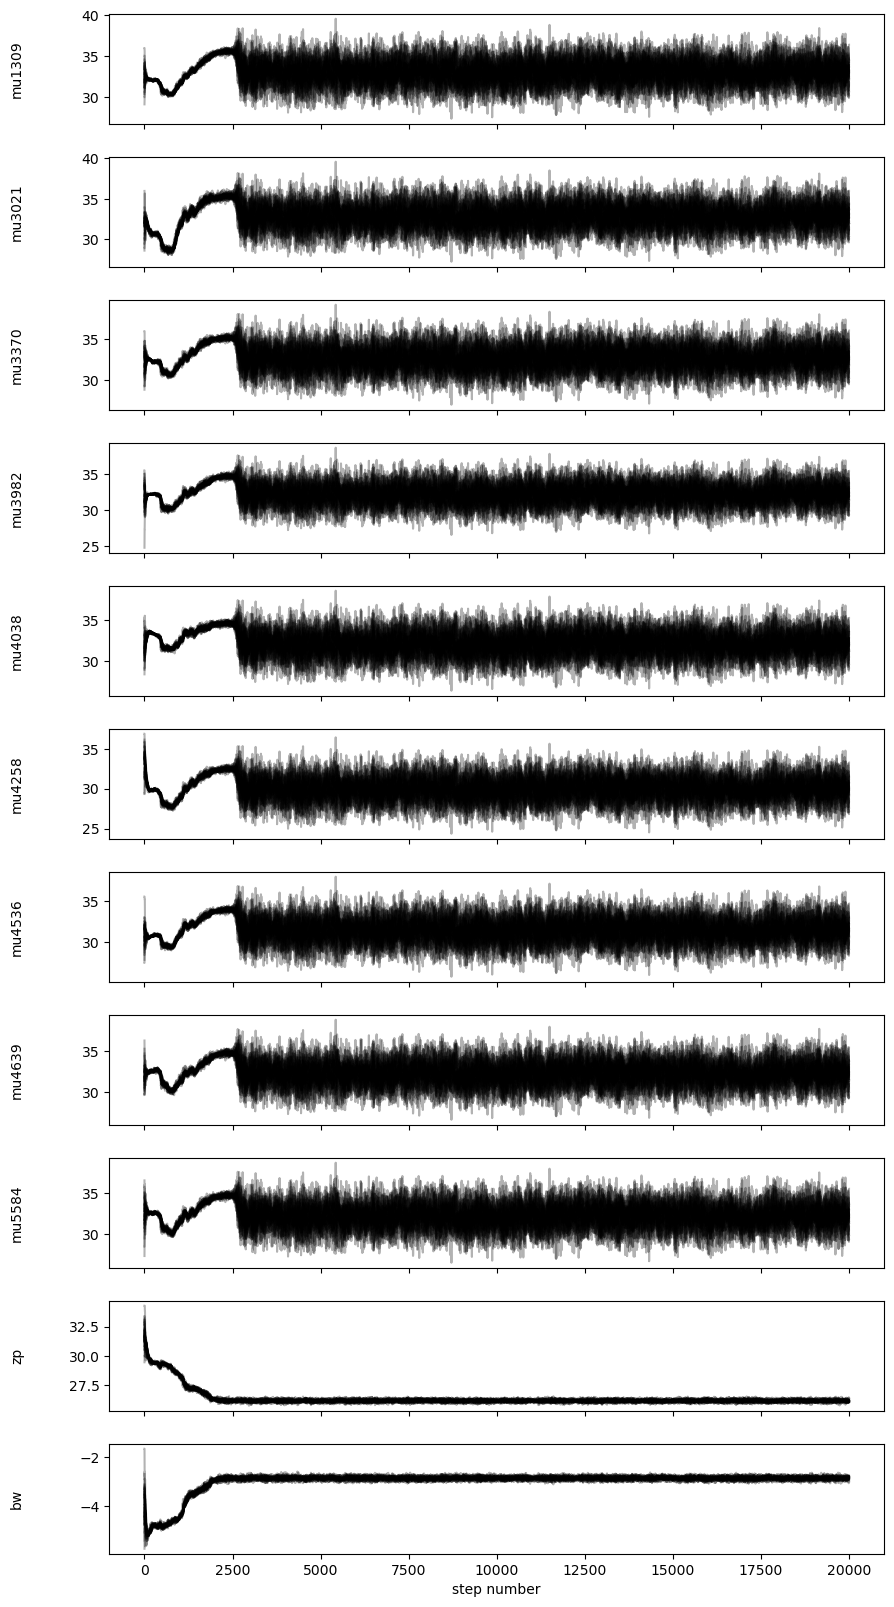

In [353]:
fig,axes=plt.subplots(11,1,figsize=(10,20),sharex=True, gridspec_kw={'hspace':0.3})
samples = sampler.get_chain()
labels = ['mu1309','mu3021','mu3370','mu3982','mu4038','mu4258','mu4536','mu4639','mu5584','zp','bw']
for i in range(11):
    ax=axes[i]
    ax.plot(samples[:,:,i],'k',alpha=.3)
    ax.set(ylabel=labels[i])
    ax.yaxis.set_label_coords(-.11,.5)
axes[-1].set_xlabel('step number')
fig.tight_layout()

In [405]:
thetarandom=flat_samples[::500,:]

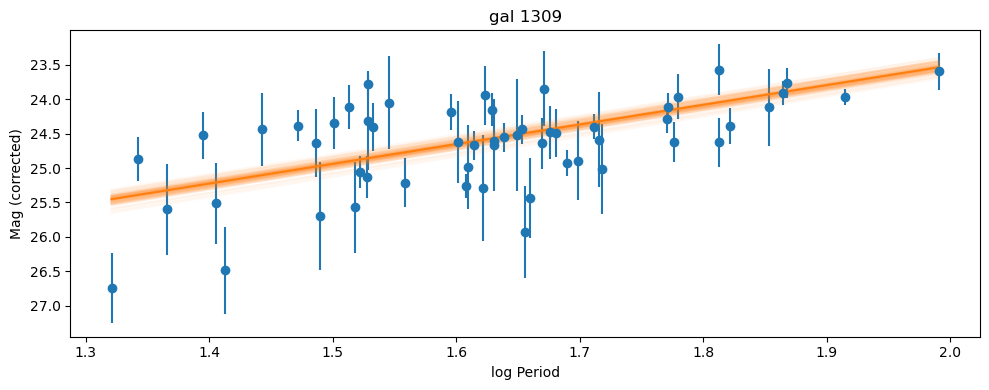

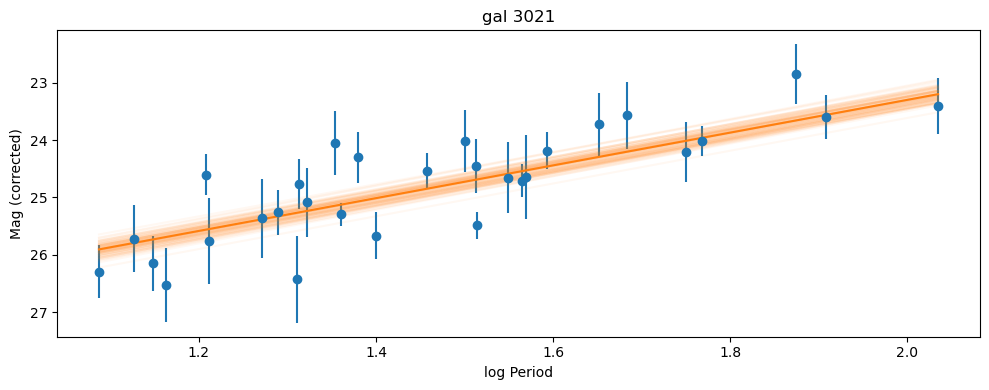

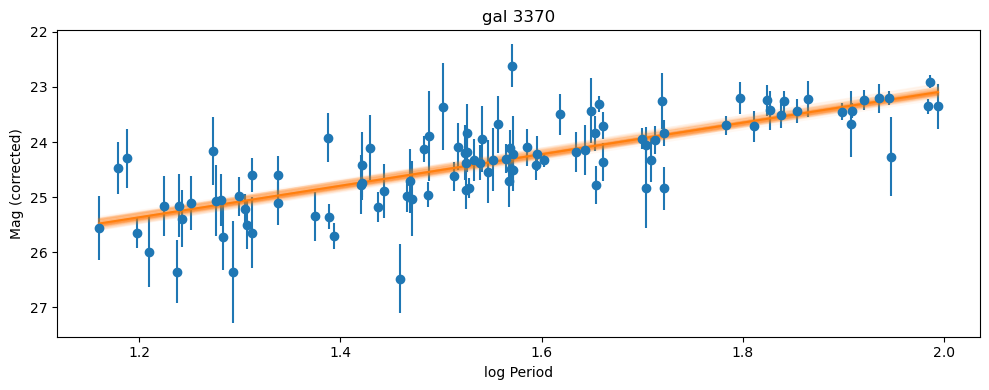

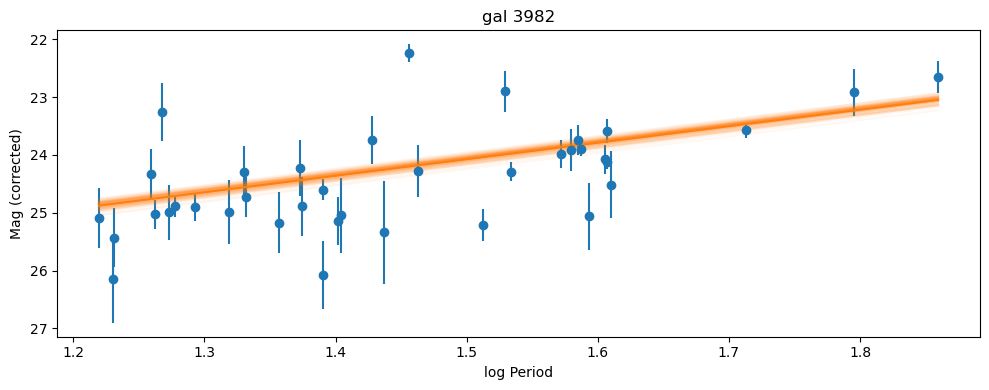

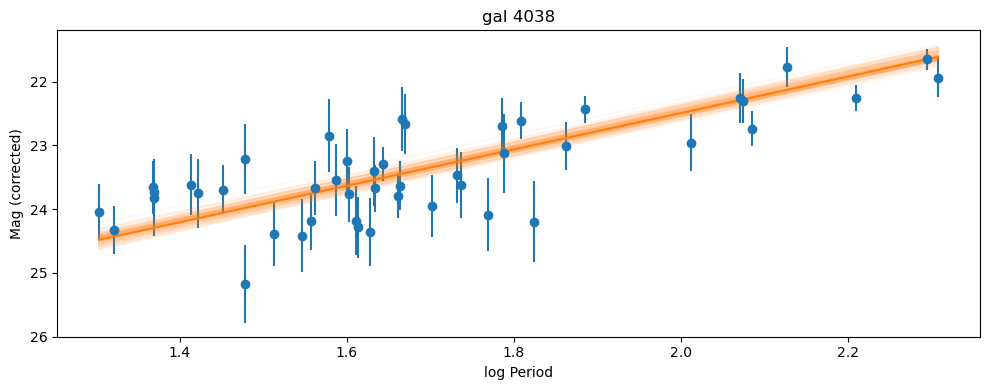

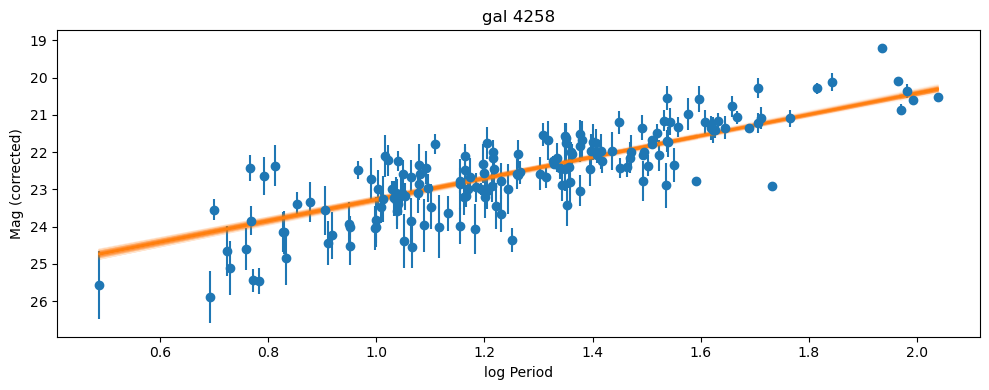

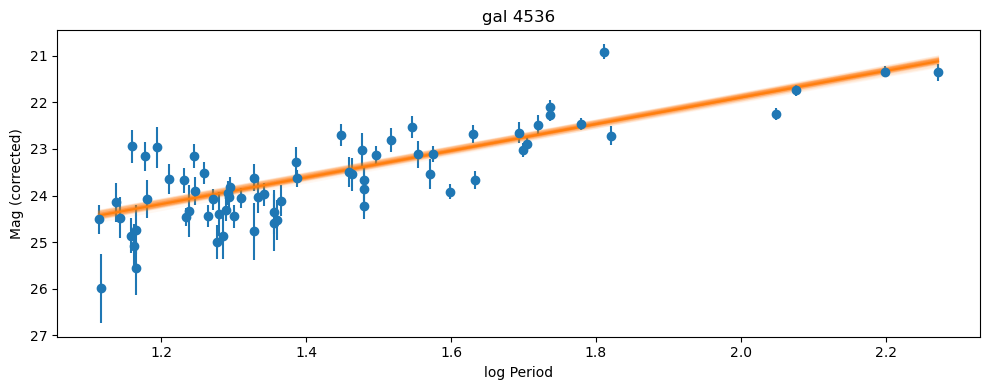

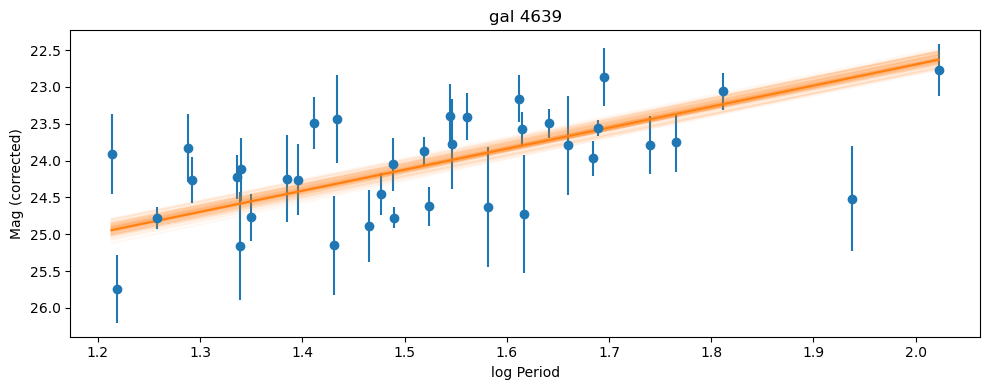

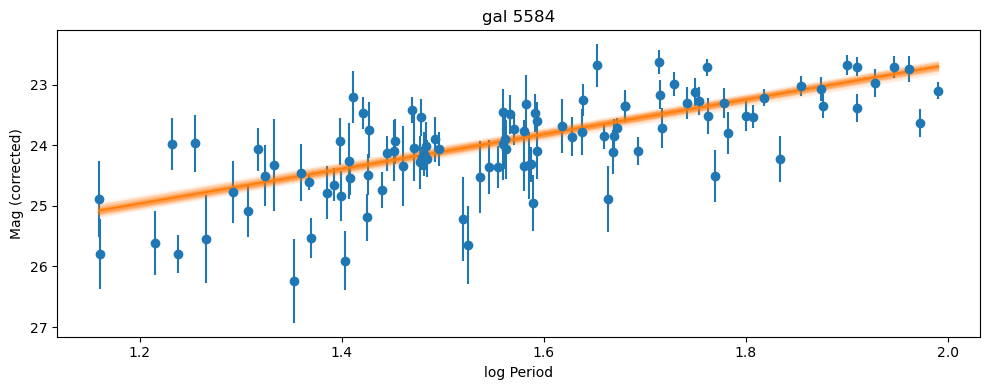

In [406]:
#test model
%matplotlib inline
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)


ceph.select(1309)
mobs = ceph.mobs
logP = ceph.logP
sigma_obs = ceph.sigma
ax.errorbar(logP, mobs, yerr=sigma_obs, linestyle='None', marker='o')
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected)')
ax.invert_yaxis()
plt.title('gal 1309')
fig.tight_layout()

for the in thetarandom:
    plt.plot(logP,model(the[0],the[5],the[9],the[10], logP), color='tab:orange',alpha=.05)
    
plt.plot(logP, model(theta[0],theta[5],theta[9],theta[10], logP))
plt.show()


fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ceph.select(3021)
mobs = ceph.mobs
logP = ceph.logP
sigma_obs = ceph.sigma
ax.errorbar(logP, mobs, yerr=sigma_obs, linestyle='None', marker='o')
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected)')
ax.invert_yaxis()
plt.title('gal 3021')
fig.tight_layout()

for the in thetarandom:
    plt.plot(logP,model(the[1],the[5],the[9],the[10], logP), color='tab:orange',alpha=.05)

plt.plot(logP, model(theta[1],theta[5],theta[9],theta[10], logP))
plt.show()

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ceph.select(3370)
mobs = ceph.mobs
logP = ceph.logP
sigma_obs = ceph.sigma
ax.errorbar(logP, mobs, yerr=sigma_obs, linestyle='None', marker='o')
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected)')
ax.invert_yaxis()
plt.title('gal 3370')
fig.tight_layout()

for the in thetarandom:
    plt.plot(logP,model(the[2],the[5],the[9],the[10], logP), color='tab:orange',alpha=.05)

plt.plot(logP, model(theta[2],theta[5],theta[9],theta[10], logP))
plt.show()

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ceph.select(3982)
mobs = ceph.mobs
logP = ceph.logP
sigma_obs = ceph.sigma
ax.errorbar(logP, mobs, yerr=sigma_obs, linestyle='None', marker='o')
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected)')
ax.invert_yaxis()
plt.title('gal 3982')
fig.tight_layout()

for the in thetarandom:
    plt.plot(logP,model(the[3],the[5],the[9],the[10], logP), color='tab:orange',alpha=.05)

plt.plot(logP, model(theta[3],theta[5],theta[9],theta[10], logP))
plt.show()

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ceph.select(4038)
mobs = ceph.mobs
logP = ceph.logP
sigma_obs = ceph.sigma
ax.errorbar(logP, mobs, yerr=sigma_obs, linestyle='None', marker='o')
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected)')
ax.invert_yaxis()
plt.title('gal 4038')
fig.tight_layout()

for the in thetarandom:
    plt.plot(logP,model(the[4],the[5],the[9],the[10], logP), color='tab:orange',alpha=.05)

plt.plot(logP, model(theta[4],theta[5],theta[9],theta[10], logP))
plt.show()

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ceph.select(4258)
mobs = ceph.mobs
logP = ceph.logP
sigma_obs = ceph.sigma
ax.errorbar(logP, mobs, yerr=sigma_obs, linestyle='None', marker='o')
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected)')
ax.invert_yaxis()
plt.title('gal 4258')
fig.tight_layout()

for the in thetarandom:
    plt.plot(logP,model(the[5],the[5],the[9],the[10], logP), color='tab:orange',alpha=.05)

plt.plot(logP, model(theta[5],theta[5],theta[9],theta[10], logP))
plt.show()

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ceph.select(4536)
mobs = ceph.mobs
logP = ceph.logP
sigma_obs = ceph.sigma
ax.errorbar(logP, mobs, yerr=sigma_obs, linestyle='None', marker='o')
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected)')
ax.invert_yaxis()
plt.title('gal 4536')
fig.tight_layout()

for the in thetarandom:
    plt.plot(logP,model(the[6],the[5],the[9],the[10], logP), color='tab:orange',alpha=.05)

plt.plot(logP, model(theta[6],theta[5],theta[9],theta[10], logP))
plt.show()

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ceph.select(4639)
mobs = ceph.mobs
logP = ceph.logP
sigma_obs = ceph.sigma
ax.errorbar(logP, mobs, yerr=sigma_obs, linestyle='None', marker='o')
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected)')
ax.invert_yaxis()
plt.title('gal 4639')
fig.tight_layout()

for the in thetarandom:
    plt.plot(logP,model(the[7],the[5],the[9],the[10], logP), color='tab:orange',alpha=.05)

plt.plot(logP, model(theta[7],theta[5],theta[9],theta[10], logP))
plt.show()

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ceph.select(5584)
mobs = ceph.mobs
logP = ceph.logP
sigma_obs = ceph.sigma
ax.errorbar(logP, mobs, yerr=sigma_obs, linestyle='None', marker='o')
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected)')
ax.invert_yaxis()
plt.title('gal 5584')
fig.tight_layout()

for the in thetarandom:
    plt.plot(logP,model(the[8],the[5],the[9],the[10], logP), color='tab:orange',alpha=.05)

plt.plot(logP, model(theta[8],theta[5],theta[9],theta[10], logP))
plt.show()


In [407]:
flat_samples = sampler.get_chain(discard=3000, thin=10, flat=True)
print(flat_samples.shape)

(42500, 11)


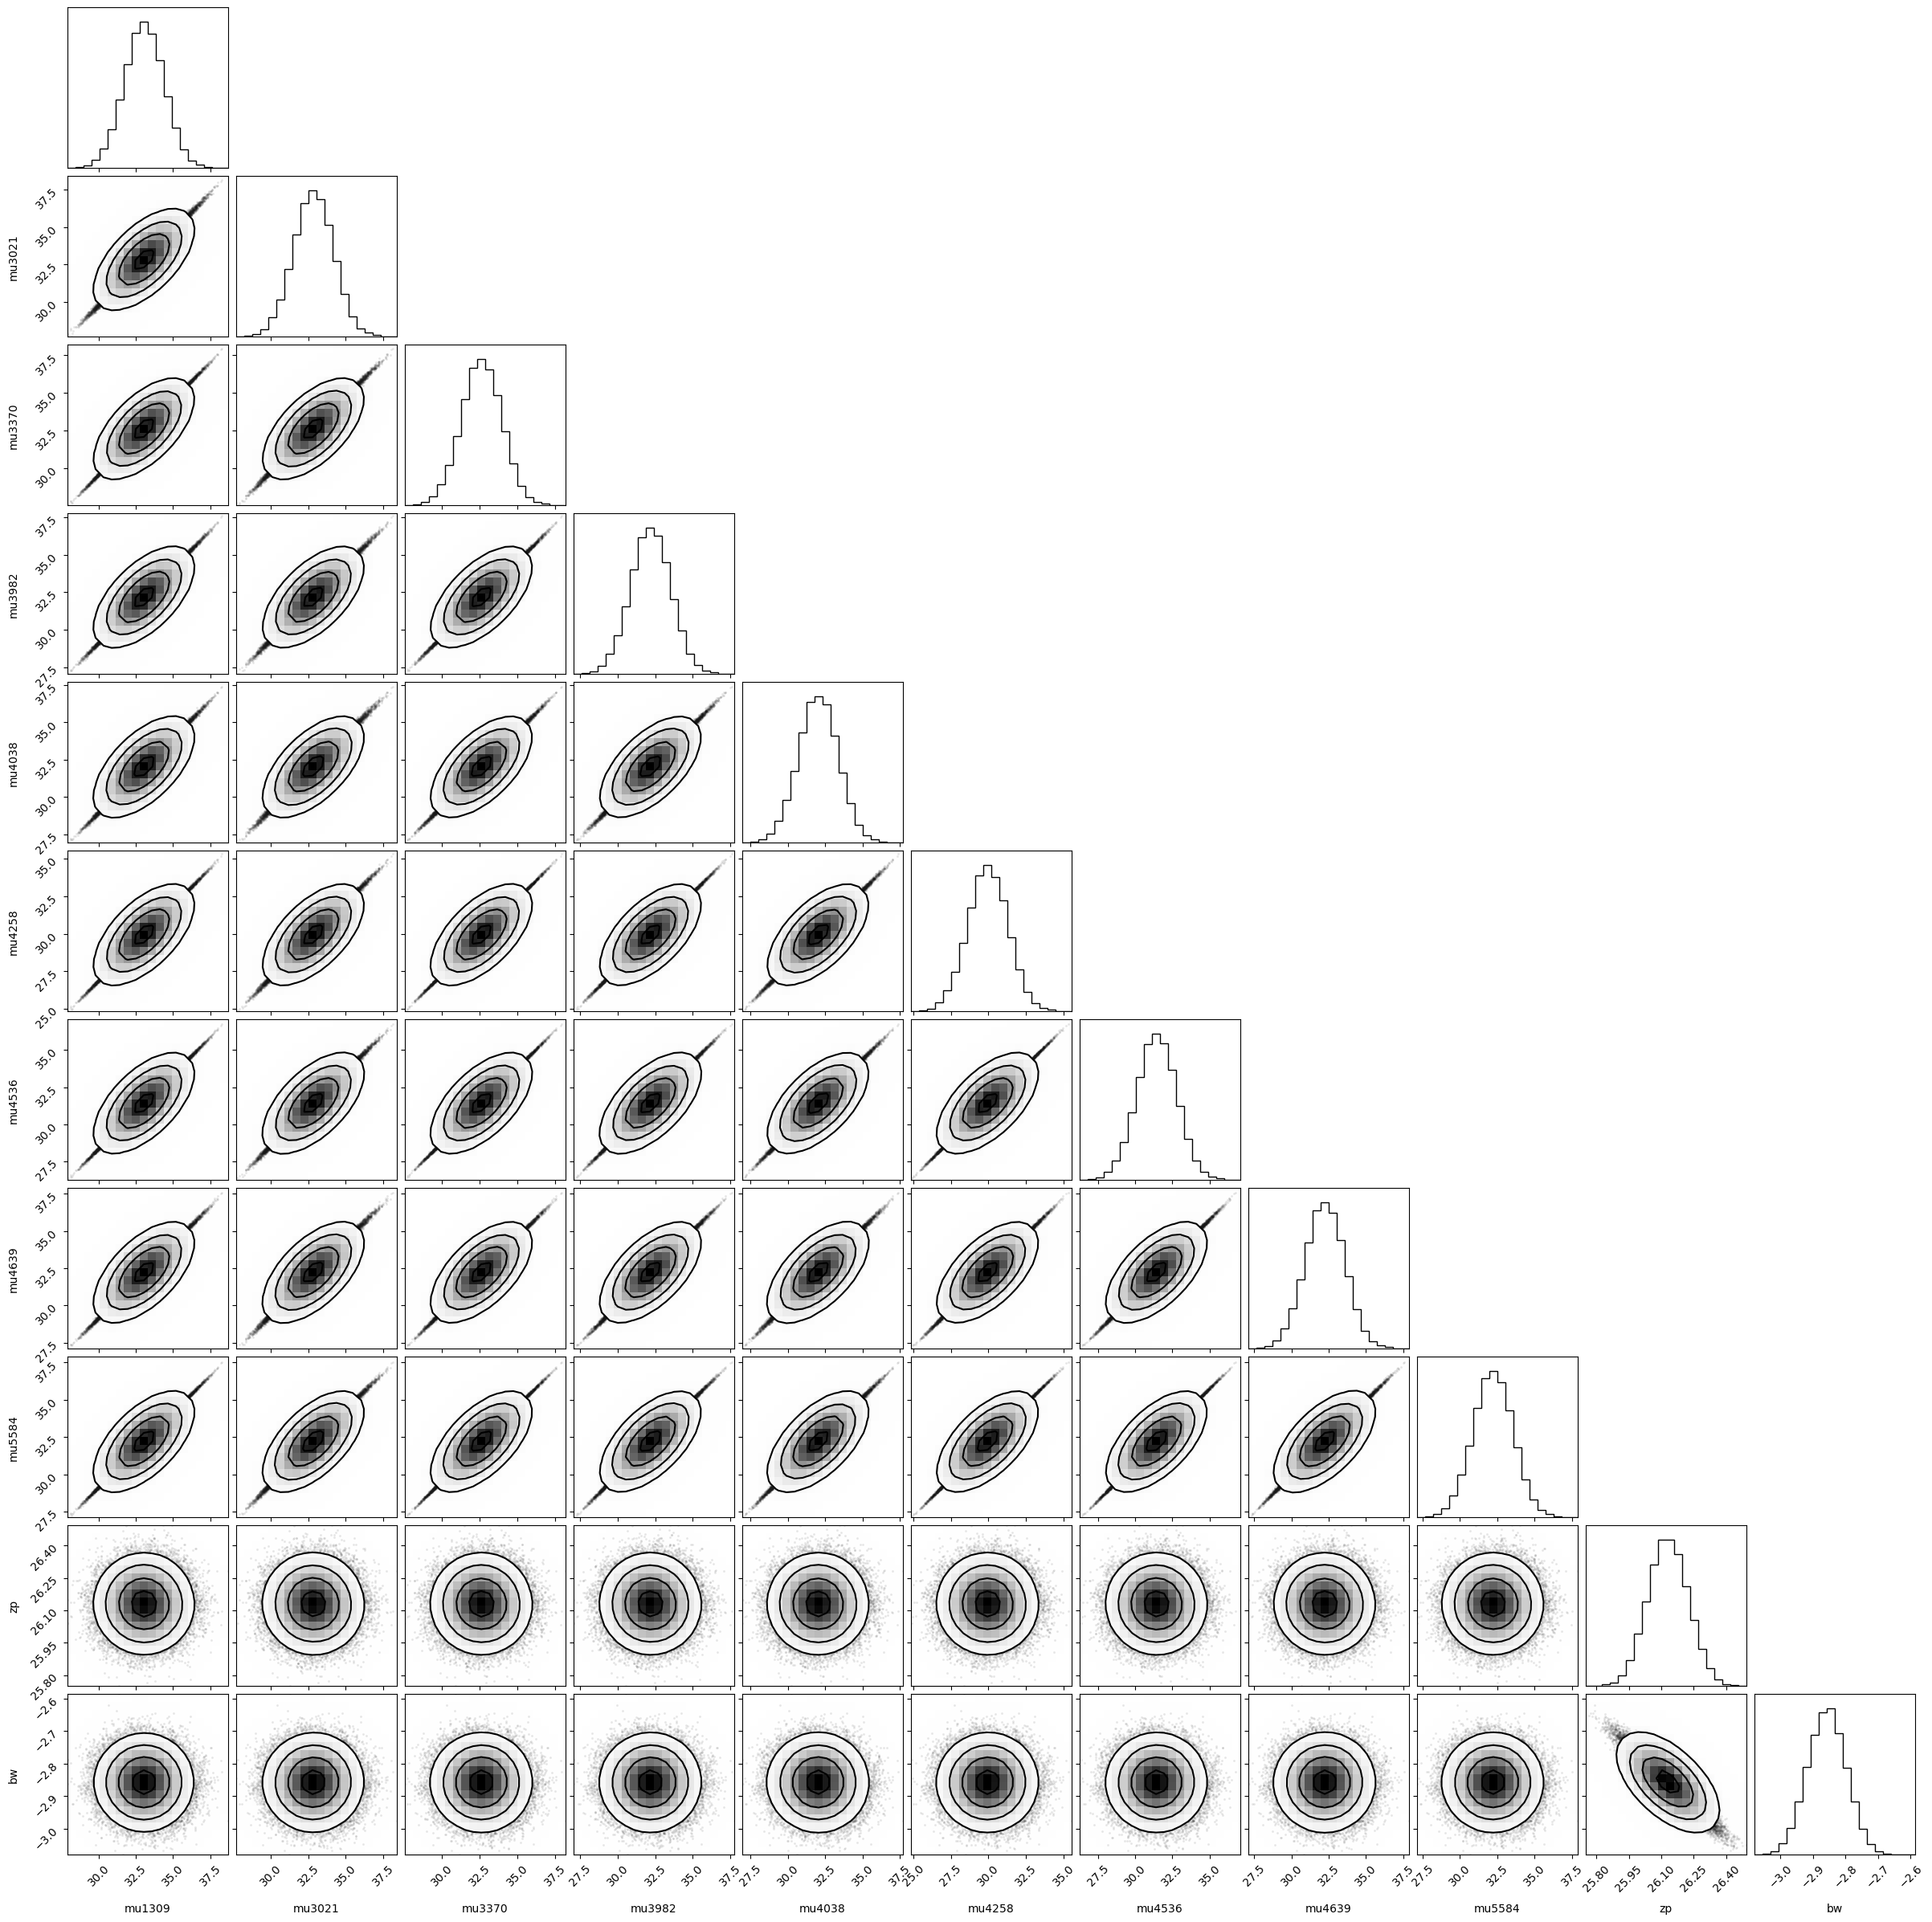

In [404]:
import corner

fig = corner.corner(flat_samples, labels=labels,plot_contours=True, smooth=2);

In [383]:
intercepts = theta[0:9]-theta[5]
mus = ['mu1309', 'mu3021', 'mu3370', 'mu3982', 'mu4038', 'mu4258', 'mu4536', 'mu4639', 'mu5584']
riess = [3.276, 3.138, 2.835, 2.475, 2.396, 0, 1.567, 2.383, 2.461]

In [395]:
for i in range(9):
    print('intercept (', mus[i], ' - mu4258: )', np.around(intercepts[i],3), ' vs. Riess et al. 2011: ', riess[i])

intercept ( mu1309  - mu4258: ) 3.096  vs. Riess et al. 2011:  3.276
intercept ( mu3021  - mu4258: ) 2.883  vs. Riess et al. 2011:  3.138
intercept ( mu3370  - mu4258: ) 2.663  vs. Riess et al. 2011:  2.835
intercept ( mu3982  - mu4258: ) 2.231  vs. Riess et al. 2011:  2.475
intercept ( mu4038  - mu4258: ) 2.076  vs. Riess et al. 2011:  2.396
intercept ( mu4258  - mu4258: ) 0.0  vs. Riess et al. 2011:  0
intercept ( mu4536  - mu4258: ) 1.483  vs. Riess et al. 2011:  1.567
intercept ( mu4639  - mu4258: ) 2.282  vs. Riess et al. 2011:  2.383
intercept ( mu5584  - mu4258: ) 2.261  vs. Riess et al. 2011:  2.461


# Q4.

## Riess et al. do a *simultaneous* fit to the Cepheids and SNe data (Table 3 of their paper). 

## I'm slightly less cruel, so you can take your intercepts $\mu_{0,i} - \mu_{0, 4258}$ and the re-express equation 4 using a substitution of equation 3.

## Write that expression down.

Equation 3:    
$m^0_{\nu,i}=(\mu_{0,i}-\mu_{0,4258})+m^0_{\nu,4258}$

$m^0_{\nu,4258}=m^0_{\nu,i}-(\mu_{0,i}-\mu_{0,4258})$

Equation 4:  
$\log H_0=\frac{(m^0_{\nu,4258}-\mu_{0,4258})+5a_\nu+25}{5}$




Combining:

$\log H_0 = \frac{(m^0_{\nu,i}-(\mu_{0,i}-\mu_{0,4258})-\mu_{0,4258})+5a_\nu+25}{5}=\frac{m^0_{\nu,i}-\mu_{0,i}+5a_\nu+25}{5}=\frac{(m^0_{\nu,i}+5a_\nu)-\mu_{0,i}+25}{5}$

$\frac{m^0_{\nu,i}+5a_\nu-(\mu_{0,i}+\mu_{0,4258})-\mu_{0,4258}+25}{5}$

# Q5

## Using the supernova data in Table 3 (enter it into whatever data structure you deem best) and the distance modulus to NGC 4258 from [Humphreys et al., 2013 ](https://ui.adsabs.harvard.edu/abs/2013ApJ...775...13H/abstract) and using the simple sample statistics you learned in Week 1, estimate the Hubble constant.

In [408]:
m5a=[16.768, 16.699, 16.545, 15.953, 15.901,0, 15.147, 16.040, 16.274]

In [484]:
H=0
for j,i in enumerate(m5a):
    if i!=0:
        temp = 10**((m5a[j]-theta[j]+25)/5)
        H+=temp
    

H=H/(len(m5a)-1)

from astropy import units
H=H*units.km*(units.s)**-1*(units.Mpc)**-1


In [485]:
print('H = ' , H) 

H =  58.70342002972804 km / (Mpc s)
